In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats

df1 = pd.read_csv('https://gist.githubusercontent.com/zgulde/cf9e11788c122bf6a75447209f8a9f0e/raw/17535dc2c29d6c47c228279e8941c037bb2d4405/one.csv')
df2 = pd.read_csv('https://gist.githubusercontent.com/zgulde/cf9e11788c122bf6a75447209f8a9f0e/raw/17535dc2c29d6c47c228279e8941c037bb2d4405/two.csv')
df3 = pd.read_csv('https://gist.githubusercontent.com/zgulde/cf9e11788c122bf6a75447209f8a9f0e/raw/a6e34db05ac8d817789c205787527974fa10c092/three.csv')

In [4]:
df3.groupby('surgeon').success.mean()

surgeon
A    0.877083
B    0.723077
Name: success, dtype: float64

In [6]:
df3.groupby(['surgeon', 'surgery']).success.mean()

surgeon  surgery     
A        appendectomy    0.934383
         heart bypass    0.656566
B        appendectomy    0.931373
         heart bypass    0.672249
Name: success, dtype: float64

In [8]:
df3.groupby(['surgeon', 'surgery']).size()

surgeon  surgery     
A        appendectomy    381
         heart bypass     99
B        appendectomy    102
         heart bypass    418
dtype: int64

In [10]:
df1.groupby('time').x.mean()

time
one    5.726669
two    7.296448
Name: x, dtype: float64

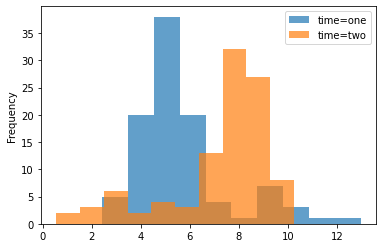

In [13]:
ax = df1[df1.time == 'one'].x.plot.hist(label='time=one', alpha=.7)
df1[df1.time == 'two'].x.plot.hist(label='time=two', ax=ax, alpha=.7)
ax.legend()

In [15]:
df1.groupby(['group', 'time']).x.mean()

group  time
a      one      5.084092
       two      2.936197
b      one     10.026997
       two      8.065904
Name: x, dtype: float64

In [17]:
df1.groupby('group').x.mean()

group
a    4.768225
b    8.326049
Name: x, dtype: float64

In [16]:
df1.groupby(['group', 'time']).size()

group  time
a      one     87
       two     15
b      one     13
       two     85
dtype: int64

[Text(0.5, 1.0, 'Time two')]

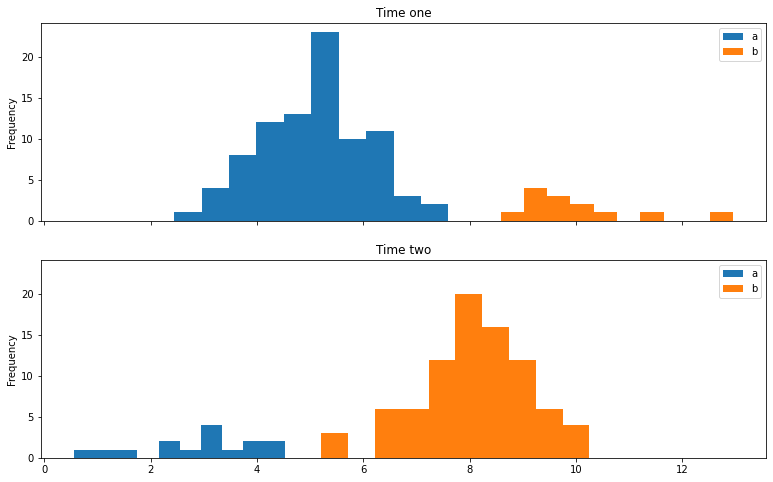

In [20]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(13, 8), sharex=True, sharey=True)

df1.query('group == "a" & time == "one"').x.plot.hist(ax=ax1, label='a')
df1.query('group == "b" & time == "one"').x.plot.hist(ax=ax1, label='b')
ax1.set(title='Time one')
ax1.legend()
df1.query('group == "a" & time == "two"').x.plot.hist(ax=ax2, label='a')
df1.query('group == "b" & time == "two"').x.plot.hist(ax=ax2, label='b')
ax2.legend()
ax2.set(title='Time two')

- the average x value is higher at time two compared to time one
- the average x value is lower for both groups at time two compared to time one

p = 1.3960403186191819e-18


[Text(0.5, 1.0, 'r = 0.5694')]

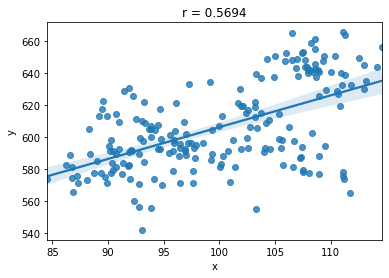

In [23]:
r, p = stats.pearsonr(df2.x, df2.y)
print('p =', p)
ax = sns.regplot(data=df2, y='y', x='x')
ax.set(title=f'r = {r:.4f}')

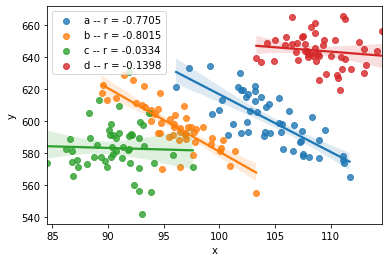

In [25]:
for group, subset in df2.groupby('group'):
    r, p = stats.pearsonr(subset.x, subset.y)
    sns.regplot(data=subset, x='x', y='y', label=f'{group} -- r = {r:.4f}')
plt.legend()

## Simpson's Paradox

When a relationship between 2 variables reverses itself when controlling for a third variable.

Takeaways:

- visualize the interactions of multiple variables
- domain knowledge is key
- statistical testing is not the whole story
- be careful about assumptions around group membership / group proportions